In [33]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import seaborn as sns

from os import system

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [36]:
original_df = pd.read_csv("LeagueDatasetTest.csv")
df = pd.read_csv("LeagueDatasetTest.csv")
del df['gc_ratio_diff']
# test_df = df(np.random.randn(100,2))
train_df, test_df = train_test_split(df, test_size = 0.2)
test_y = test_df['fpoints'].values
# train_df.reset_index(drop=True)

In [37]:
train_df.describe(include='all')

,c_avg_deg_cons,c_avg_dom_cons,c_avg_domdeg_cons,c_bounds_d,c_bounds_r,c_bounds_z,c_cv_deg_cons,c_cv_dom_cons,c_cv_domdeg_cons,c_domain,...,v_ratio_bounded,v_ratio_vars,v_sum_deg_vars,v_sum_dom_vars,v_sum_domdeg_vars,number_of_teams,fixtures_left,number_of_constraints,runtime,fpoints
count,1560.000000,1560.000000,1560.000000,1560.0,1560.0,1560.0,1560.000000,1560.000000,1560.000000,1560.0,...,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000
mean,2.720733,4.800383,1.699695,0.0,0.0,0.0,0.598845,0.703876,0.454157,0.0,...,0.320797,0.977088,1272.539744,1262.095513,544.119571,9.106410,3.969872,3.003846,2.900891,16.849359
std,0.069308,0.483840,0.126127,0.0,0.0,0.0,0.081405,0.067574,0.066501,0.0,...,0.123004,0.006477,485.034087,499.541815,208.591116,1.683093,2.161471,1.421447,5.599976,7.607498
min,2.433570,3.692010,1.427480,0.0,0.0,0.0,0.412949,0.504949,0.281516,0.0,...,0.133333,0.950000,337.000000,338.000000,152.250000,6.000000,1.000000,1.000000,0.020000,-1.000000
25%,2.689720,4.480310,1.599390,0.0,0.0,0.0,0.530124,0.656777,0.401897,0.0,...,0.205591,0.973529,851.000000,812.750000,358.126000,8.000000,2.000000,2.000000,0.040000,12.000000
50%,2.745805,4.905275,1.716150,0.0,0.0,0.0,0.624937,0.711736,0.451936,0.0,...,0.321285,0.978533,1322.000000,1278.000000,579.804500,10.000000,4.000000,3.000000,0.050000,17.000000
75%,2.768140,5.233590,1.811825,0.0,0.0,0.0,0.662077,0.752853,0.509880,0.0,...,0.376278,0.982222,1679.000000,1682.000000,714.767500,10.000000,6.000000,4.000000,0.807500,22.000000
max,2.825540,5.468870,1.889450,0.0,0.0,0.0,0.720174,0.817758,0.562234,0.0,...,0.611881,0.987749,2134.000000,2233.000000,928.874000,11.000000,8.000000,5.000000,15.020000,39.000000


In [32]:
def getAverages(lst, average_feature, average_result):
    copy_lst = lst.reset_index(drop=True)
#     print(lst.reset_index())
#     print(copy_lst[average_feature])
    averages = []
#     print(copy_lst[21])
    for value in range(1, copy_lst[average_feature].max()+1):
        value_indices = np.where(copy_lst[average_feature]==value)
        total=0
        for value_index in value_indices[0]:
            total += copy_lst[average_result][value_index]
        if len(value_indices[0]) != 0:
            averages.append([value, total/len(value_indices[0])])
    return averages

fixtures_left = train_df['fixtures_left']
# print(getAverages(fixtures_left))
result = getAverages(train_df, 'number_of_teams', 'fpoints')
# result.keys()
print(result)


[[6, 10.891566265060241], [7, 12.535], [10, 18.605678233438486]]


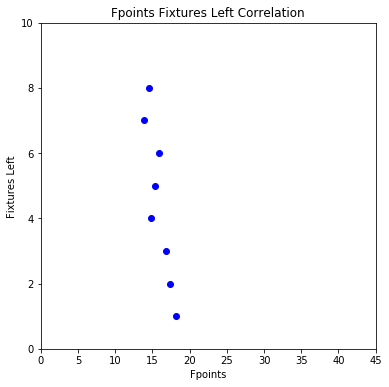

In [31]:
results = getAverages(train_df, 'fixtures_left', 'fpoints')
fpoints = []
fixtures_left = []
for item in results:
    fpoints.append(item[1])
    fixtures_left.append(item[0])

fig = plt.figure(figsize=(6,6))
plt.title('Fpoints Fixtures Left Correlation')
plt.scatter(fpoints, fixtures_left, color='blue', marker='o')
plt.xlabel('Fpoints')
plt.ylabel('Fixtures Left')
plt.xlim(0,45.0)
plt.ylim(0,10)
plt.show()

[[6, 10.933333333333334], [7, 12.61340206185567], [8, 15.331932773109244], [10, 18.420970266040687], [11, 20.41358024691358]]


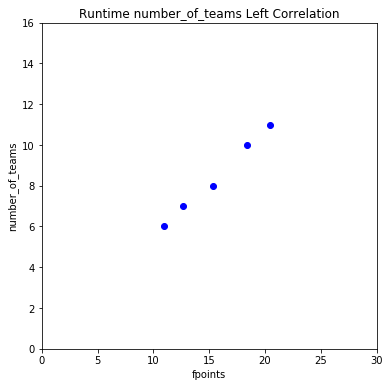

In [40]:
results = getAverages(train_df, 'number_of_teams', 'fpoints')
fpoints = []
number_of_teams = []
print(results)
for item in results:
    fpoints.append(item[1])
    number_of_teams.append(item[0])

fig = plt.figure(figsize=(6,6))
plt.title('Runtime number_of_teams Left Correlation')
plt.scatter(fpoints, number_of_teams, color='blue', marker='o')
plt.xlabel('fpoints')
plt.ylabel('number_of_teams')
plt.xlim(0,30)
plt.ylim(0,16)
plt.show()

In [17]:
train_y = train_df['fpoints'].values
league_numeric_features = ['c_avg_deg_cons',
 'c_avg_dom_cons',
 'c_avg_domdeg_cons',
 'c_cv_deg_cons',
 'c_cv_dom_cons',
 'c_cv_domdeg_cons',
 'c_ent_deg_cons',
 'c_ent_dom_cons',
 'c_ent_domdeg_cons',
 'c_logprod_deg_cons',
 'c_logprod_dom_cons',
 'c_max_deg_cons',
 'c_max_dom_cons',
 'c_max_domdeg_cons',
 'c_num_cons',
 'c_ratio_cons',
 'c_sum_ari_cons',
 'c_sum_dom_cons',
 'c_sum_domdeg_cons',
 'd_bool_vars',
 'd_int_cons',
 'd_int_vars',
 'd_ratio_bool_vars',
 'd_ratio_int_cons',
 'd_ratio_int_vars',
 'o_deg',
 'o_deg_avg',
 'o_deg_cons',
 'o_deg_std',
 'o_dom',
 'o_dom_avg',
 'o_dom_std',
 'v_avg_deg_vars',
 'v_avg_dom_vars',
 'v_avg_domdeg_vars',
 'v_cv_deg_vars',
 'v_cv_dom_vars',
 'v_cv_domdeg_vars',
 'v_def_vars',
 'v_ent_deg_vars',
 'v_ent_dom_vars',
 'v_ent_domdeg_vars',
 'v_intro_vars',
 'v_logprod_deg_vars',
 'v_logprod_dom_vars',
 'v_max_deg_vars',
 'v_max_dom_vars',
 'v_max_domdeg_vars',
 'v_min_dom_vars',
 'v_min_domdeg_vars',
 'v_num_aliases',
 'v_num_consts',
 'v_num_vars',
 'v_ratio_bounded',
 'v_ratio_vars',
 'v_sum_deg_vars',
 'v_sum_dom_vars',
 'v_sum_domdeg_vars\n\n',
 'number_of_teams',
 'fixtures_left',
 'number_of_constraints']

null_league_numeric_values = [
    'v_min_deg_vars',
    'c_bounds_d',
    'c_bounds_r',
    'c_bounds_z',
    'd_ratio_set_cons',
    'd_ratio_set_vars',
    'd_set_cons',
    'd_set_vars',
    'gc_diff_globs',
    'gc_global_cons',
    'gc_ratio_diff',
    'gc_ratio_globs',
    's_bool_search',
    's_first_fail',
    's_goal',
    's_indomain_max',
    's_indomain_min',
    's_input_order',
    's_int_search',
    's_labeled_vars',
    's_other_val',
    's_other_var',
    's_set_search',
    'o_dom_deg',
    'd_ratio_float_cons',
    'd_ratio_float_vars',
    'c_min_deg_cons',
    'c_min_dom_cons',
    'c_min_domdeg_cons',
    'd_ratio_array_cons',
    'd_ratio_bool_cons',
    'd_float_cons',
    'd_float_vars',
    'd_array_cons',
    'd_bool_cons',
    'c_domain',
    'c_priority',
]

In [18]:
random_forest = Pipeline([
    ('pre', ColumnTransformer([("num", FunctionTransformer(lambda x : x), league_numeric_features)], remainder="drop")),
    ("est", RandomForestRegressor(n_estimators=60, max_depth=3))
])

In [42]:
np.mean(cross_val_score(random_forest, test_df, test_y, scoring="neg_mean_absolute_error", cv=10))

-4.388703715196977

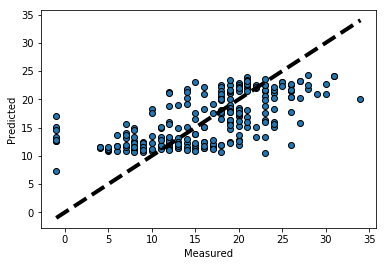

In [20]:
predicted = cross_val_predict(random_forest, test_df, test_y, cv=10)

fix, ax = plt.subplots()
ax.scatter(test_y, predicted, edgecolors=(0,0,0))
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

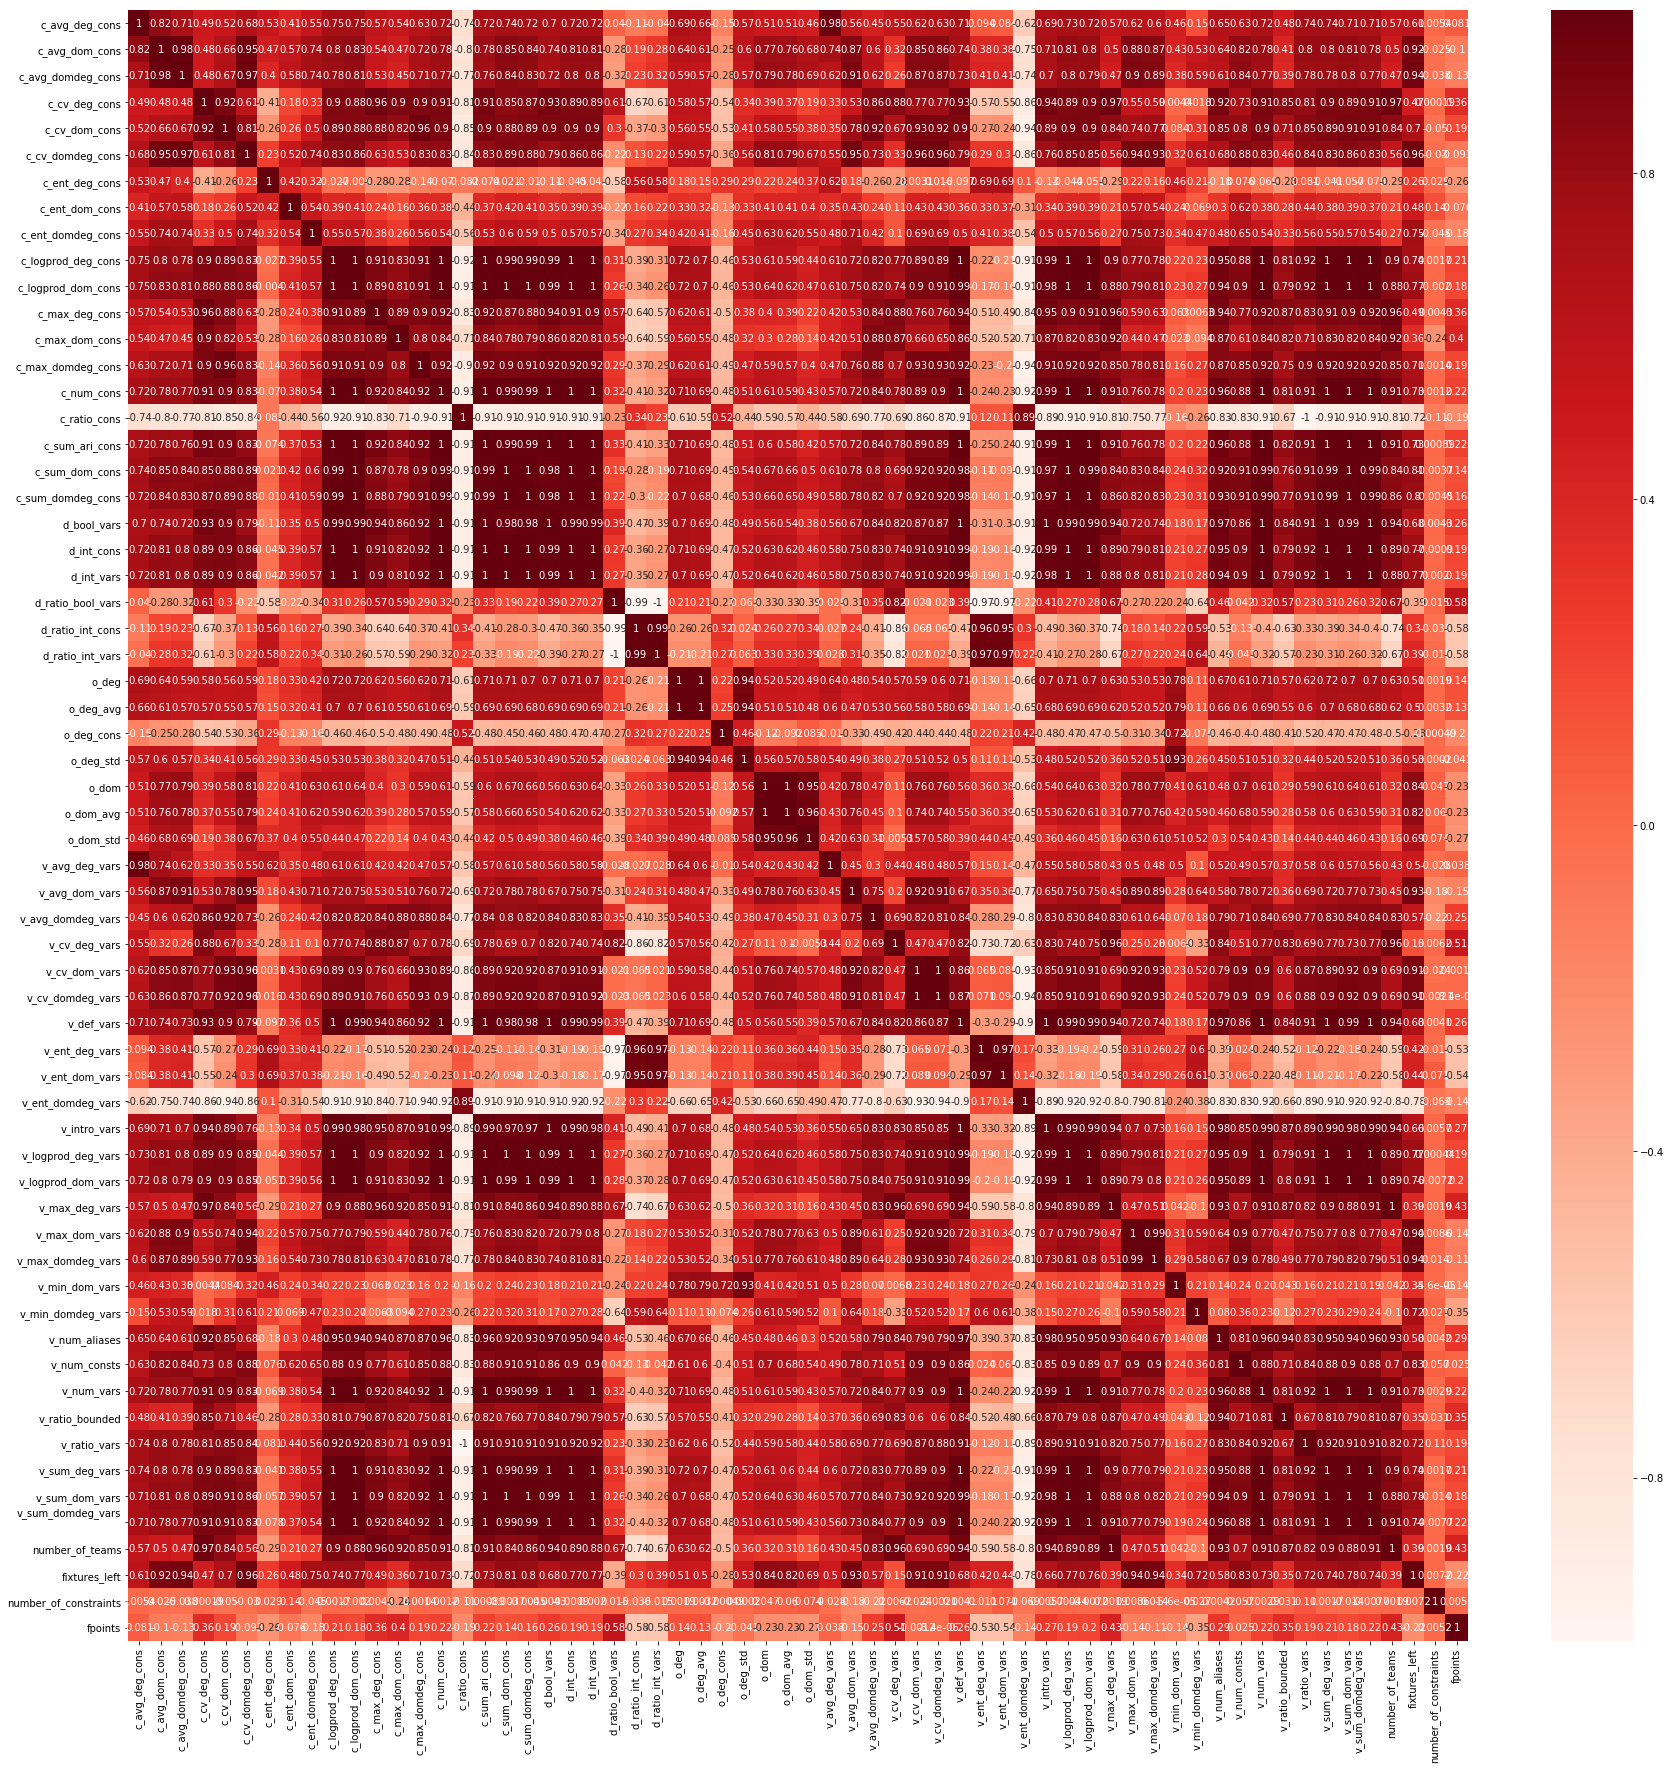

In [21]:
# split the features into sets of 5, check their correlation with output, and delete
# uncorrelated features
split_features = []
# league_numeric_features += ['result']
features_with_y = league_numeric_features
# train_df['result'] = train_y

for i in range(0, len(features_with_y), 10):
    split_features.append(features_with_y[i:i+10]+['fpoints'])

# print(split_features)
# list(df.columns)
plt.figure(figsize=(30,30))
# cor = train_df[split_features[1]].corr()
cor = train_df[league_numeric_features+['fpoints']].corr()
# print(train_df[split_features[1]].corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()